# Cluster Investigation

- v2 - Added NEU lab test (not better)
- v3 - Only including top features from xgboost: (not better)
 > ['NEU--SISTEMATICODESANGRE',
 'EDAD',
 'LIN--SISTEMATICODESANGRE',
 'PCR--PROTEINACREACTIVA',
 'PLAQ--SISTEMATICODESANGRE',
 'DD--DIMEROD',
 'SAT_02_PRIMERA_URG',
 'CREA--CREATININA',
 'TEMP_PRIMERA_URG',
 'TA_MAX_PRIMERA_URG']

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb
#!pip install missingno
import missingno as msno
from sklearn import preprocessing as p
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import warnings

%matplotlib inline

color = sb.color_palette("Set2")[0]
palette = sb.color_palette("Set2")

## Gather & Clean Data

In [2]:
df = pd.read_csv('../data/cleaned_data_v2-combined_v2.csv', sep=',', index_col = 0)
df.head()


,EDAD,IDINGRESO,TA_MAX_PRIMERA_URG,TA_MIN_PRIMERA_URG,TEMP_PRIMERA_URG,FC_PRIMERA_URG,SAT_02_PRIMERA_URG,GLU_PRIMERA_URG,CREA--CREATININA,DD--DIMEROD,LIN--SISTEMATICODESANGRE,NEU--SISTEMATICODESANGRE,PCR--PROTEINACREACTIVA,PLAQ--SISTEMATICODESANGRE,FEMALE,MALE,DEATH,RECOVERED,RECOVERY_IN_PROGRESS
0,55,508,0,0,0.0,0,0,0,0.705,399.000000,2.290,3.885,6.080000,472.000000,0,1,0,1,0
1,54,509,0,0,0.0,0,0,0,0.800,398.000000,2.355,4.620,13.310000,657.000000,0,1,0,1,0
2,73,510,0,0,0.0,0,0,0,1.056,4396.750000,1.482,6.082,3.760000,306.000000,0,1,0,1,0
3,70,512,0,0,0.0,0,0,0,0.670,497.333333,1.395,9.175,21.986667,278.166667,1,0,0,0,1
4,61,513,0,0,0.0,0,0,0,0.670,470.000000,1.010,6.220,7.370000,318.000000,1,0,0,1,0


In [3]:
# Start cleaning on copied data
data = df.copy()
data.columns

Index(['EDAD', 'IDINGRESO', 'TA_MAX_PRIMERA_URG', 'TA_MIN_PRIMERA_URG',
       'TEMP_PRIMERA_URG', 'FC_PRIMERA_URG', 'SAT_02_PRIMERA_URG',
       'GLU_PRIMERA_URG', 'CREA--CREATININA', 'DD--DIMEROD',
       'LIN--SISTEMATICODESANGRE', 'NEU--SISTEMATICODESANGRE',
       'PCR--PROTEINACREACTIVA', 'PLAQ--SISTEMATICODESANGRE', 'FEMALE', 'MALE',
       'DEATH', 'RECOVERED', 'RECOVERY_IN_PROGRESS'],
      dtype='object')

In [4]:
# Column selection from xgboost
keep_list = ['IDINGRESO','NEU--SISTEMATICODESANGRE', 'EDAD', 'LIN--SISTEMATICODESANGRE', 'PCR--PROTEINACREACTIVA', 'PLAQ--SISTEMATICODESANGRE', 'DD--DIMEROD', 'SAT_02_PRIMERA_URG', 'CREA--CREATININA', 'TEMP_PRIMERA_URG', 'TA_MAX_PRIMERA_URG', 'DEATH', 'RECOVERED', 'RECOVERY_IN_PROGRESS']

data = data[keep_list]
data.columns

Index(['IDINGRESO', 'NEU--SISTEMATICODESANGRE', 'EDAD',
       'LIN--SISTEMATICODESANGRE', 'PCR--PROTEINACREACTIVA',
       'PLAQ--SISTEMATICODESANGRE', 'DD--DIMEROD', 'SAT_02_PRIMERA_URG',
       'CREA--CREATININA', 'TEMP_PRIMERA_URG', 'TA_MAX_PRIMERA_URG', 'DEATH',
       'RECOVERED', 'RECOVERY_IN_PROGRESS'],
      dtype='object')

In [5]:
# Feature Scaling: Normalize, MinMaxScale
norm_list = data.columns.drop(['IDINGRESO'])
data[norm_list] = p.MinMaxScaler(copy=False).fit_transform(data[norm_list])
data

,IDINGRESO,NEU--SISTEMATICODESANGRE,EDAD,LIN--SISTEMATICODESANGRE,PCR--PROTEINACREACTIVA,PLAQ--SISTEMATICODESANGRE,DD--DIMEROD,SAT_02_PRIMERA_URG,CREA--CREATININA,TEMP_PRIMERA_URG,TA_MAX_PRIMERA_URG,DEATH,RECOVERED,RECOVERY_IN_PROGRESS
0,508,0.079099,0.518868,0.023995,0.010341,0.526973,0.003650,0.000000,0.033008,0.000000,0.000000,0.0,1.0,0.0
1,509,0.094200,0.509434,0.024697,0.023276,0.737081,0.003640,0.000000,0.039407,0.000000,0.000000,0.0,1.0,0.0
2,510,0.124237,0.688679,0.015262,0.006190,0.338444,0.042876,0.000000,0.056652,0.000000,0.000000,0.0,1.0,0.0
3,512,0.187784,0.660377,0.014321,0.038799,0.306833,0.004615,0.000000,0.030650,0.000000,0.000000,0.0,0.0,1.0
4,513,0.127073,0.575472,0.010160,0.012649,0.352073,0.004347,0.000000,0.030650,0.000000,0.000000,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,1786,0.083311,0.594340,0.019455,0.004419,0.235094,0.004651,0.000000,0.051533,0.917706,0.695455,0.0,1.0,0.0
2064,1805,0.106116,0.716981,0.010268,0.145648,0.305508,0.025246,0.939394,0.095318,0.885287,0.645455,1.0,0.0,0.0
2065,1801,0.062971,0.386792,0.008971,0.116343,0.137422,0.006280,0.989899,0.050439,0.955112,0.536364,0.0,0.0,1.0
2066,1803,0.056808,0.424528,0.009836,0.120315,0.293015,0.005838,0.000000,0.029303,0.000000,0.000000,0.0,0.0,1.0


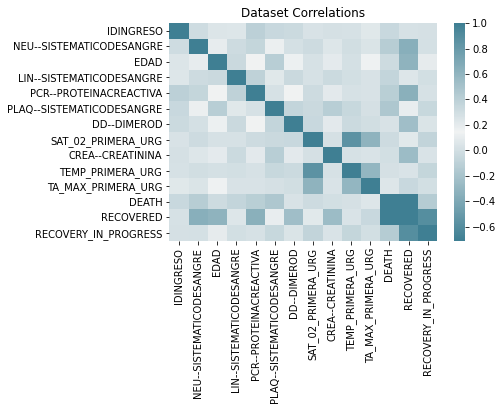

In [6]:
# Correlation Heatmap
cmap = sb.diverging_palette(220, 220, as_cmap=True)
sb.heatmap(data.corr(), cmap = cmap);
plt.title('Dataset Correlations');
plt.savefig('../visualizations/dataset_correlations.png', bbox_inches='tight')

In [7]:
# DEATH correlations
death_corr = data.corr().loc['DEATH'].abs().sort_values(ascending = False)
death_corr = pd.DataFrame(death_corr)
death_corr = death_corr[(death_corr < 1.0) & (death_corr > 0.05)].dropna()
keep_list = death_corr.iloc[1:].index.drop(['RECOVERY_IN_PROGRESS'])
keep_list

Index(['NEU--SISTEMATICODESANGRE', 'PCR--PROTEINACREACTIVA', 'EDAD',
       'CREA--CREATININA', 'DD--DIMEROD', 'PLAQ--SISTEMATICODESANGRE',
       'LIN--SISTEMATICODESANGRE', 'TA_MAX_PRIMERA_URG'],
      dtype='object')

<ipython-input-8-53b01b618d8c>:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


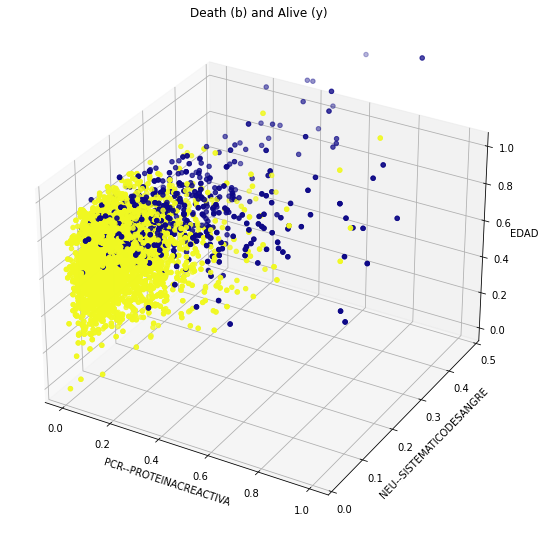

In [8]:
# Visualization Function
from mpl_toolkits.mplot3d import Axes3D

def plot_data(data, labels, keep_list):
    fig = plt.figure(figsize=(7,7));
    ax = Axes3D(fig)
    ax.scatter(data[keep_list[1]], data[keep_list[0]], data[keep_list[2]], c = labels, cmap = 'plasma_r');
    
    ax.set_xlabel(keep_list[1])
    ax.set_ylabel(keep_list[0])
    ax.set_zlabel(keep_list[2])

    plt.ylim([0,0.5])
    
    return 

plot_data(data, data.DEATH, keep_list) # Death
plt.title('Death (b) and Alive (y)')
plt.savefig('../visualizations/cluster_death_v2.png', bbox_inches='tight')

In [9]:
# RECOVERY correlations
rev_corr = data.corr().loc['RECOVERED'].abs().sort_values(ascending = False)
rev_corr = pd.DataFrame(death_corr)
rev_corr = rev_corr[(rev_corr < 1.0) & (rev_corr > 0.05)].dropna()
rev_list = rev_corr.iloc[1:].index.drop(['RECOVERY_IN_PROGRESS'])
rev_list

Index(['NEU--SISTEMATICODESANGRE', 'PCR--PROTEINACREACTIVA', 'EDAD',
       'CREA--CREATININA', 'DD--DIMEROD', 'PLAQ--SISTEMATICODESANGRE',
       'LIN--SISTEMATICODESANGRE', 'TA_MAX_PRIMERA_URG'],
      dtype='object')

<ipython-input-8-53b01b618d8c>:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


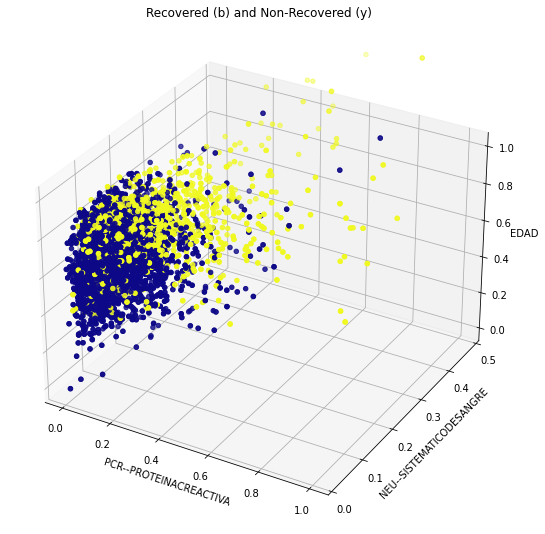

In [10]:
plot_data(data, data.RECOVERED, rev_list) # Recovered
plt.title('Recovered (b) and Non-Recovered (y)')
plt.savefig('../visualizations/cluster_recovered_v2.png', bbox_inches='tight')

In [11]:
# RECOVERY correlations
rip_corr = data.corr().loc['RECOVERED'].abs().sort_values(ascending = False)
rip_corr = pd.DataFrame(rip_corr)
rip_corr = rip_corr[(rip_corr < 1.0) & (rip_corr > 0.05)].dropna()
rip_corr = rip_corr.iloc[1:].index.drop(['RECOVERY_IN_PROGRESS'])
rip_corr

Index(['NEU--SISTEMATICODESANGRE', 'PCR--PROTEINACREACTIVA', 'EDAD',
       'CREA--CREATININA', 'DD--DIMEROD', 'PLAQ--SISTEMATICODESANGRE',
       'SAT_02_PRIMERA_URG', 'LIN--SISTEMATICODESANGRE'],
      dtype='object')

<ipython-input-8-53b01b618d8c>:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


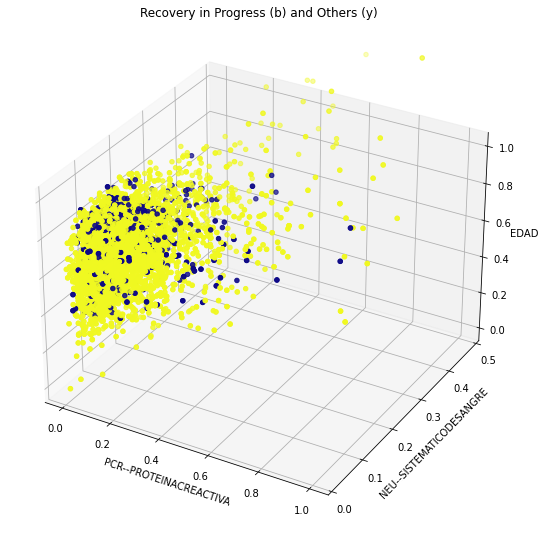

In [12]:
plot_data(data, data.RECOVERY_IN_PROGRESS, rip_corr) # Recovered
plt.title('Recovery in Progress (b) and Others (y)')
plt.savefig('../visualizations/cluster_recovery_in_progress_v2.png', bbox_inches='tight')

## Clustering

In [13]:
# Elbow function
def elbow(data, nr_centers):
    
    '''
    Objective: To find the optimal nr of centers for the data
    Inputs
        data = dataset
        nr_centers = range of nr of centers to test
    returns the score, eg the average distance of the points from the centers
    '''
    
    # Instantinate model
    model = KMeans(nr_centers)
    
    # Fit to data
    fit = model.fit(data)
    
    # Obtain the score for each model
    score = np.abs(model.score(data))
    
    return score

In [14]:
# Columns included
X = data[data.columns.drop(['IDINGRESO', 'DEATH', 'RECOVERED', 'RECOVERY_IN_PROGRESS'])]
list(X.columns)

['NEU--SISTEMATICODESANGRE',
 'EDAD',
 'LIN--SISTEMATICODESANGRE',
 'PCR--PROTEINACREACTIVA',
 'PLAQ--SISTEMATICODESANGRE',
 'DD--DIMEROD',
 'SAT_02_PRIMERA_URG',
 'CREA--CREATININA',
 'TEMP_PRIMERA_URG',
 'TA_MAX_PRIMERA_URG']

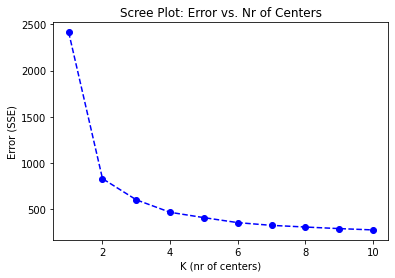

In [15]:
# Elobow method to choose nr of centers
scores =[]
centers = range(1,11)

for i in centers:
    scores.append(elbow(X,i))
    
# Plot the score against k
plt.plot(centers, scores, linestyle='--', marker='o', color='b')
plt.xlabel('K (nr of centers)')
plt.ylabel('Error (SSE)')
plt.title('Scree Plot: Error vs. Nr of Centers')
plt.savefig('../visualizations/scree_plot_v2.png', bbox_inches='tight')

4 Clusters seem to describe the data best - Although all with high errors

In [18]:
# KM Model
nr_clusters = 2

# Instatinate model
model = KMeans(nr_clusters)

# Fit model
fit_model = model.fit(X) # Obs, no train

# Predictions
y_pred = fit_model.predict(X) # Obs, no test

print(f'Model error (SSE): {np.abs(round(fit_model.score(X),0))}')

Model error (SSE): 830.0


<ipython-input-19-4db3259a21d1>:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


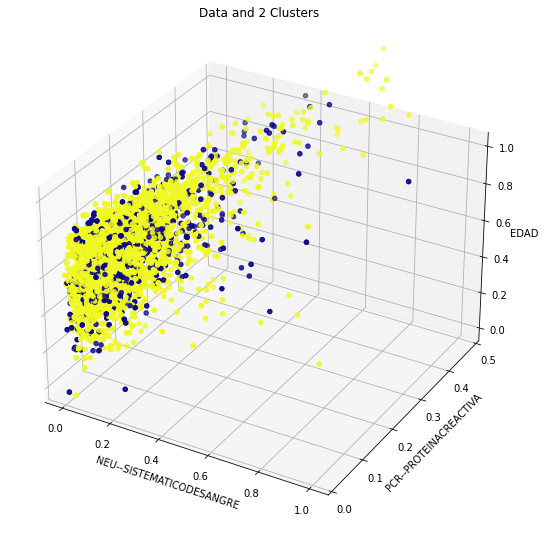

In [19]:
def plot_data(data, labels, keep_list):
    fig = plt.figure(figsize=(7,7));
    ax = Axes3D(fig)
    ax.scatter(data[keep_list[0]], data[keep_list[1]], data[keep_list[2]], c = labels, cmap = 'plasma_r');
    
    ax.set_xlabel(keep_list[0])
    ax.set_ylabel(keep_list[1])
    ax.set_zlabel(keep_list[2])

    plt.ylim([0,0.5])
    
    return 

plot_data(data, y_pred, keep_list) # Recovered
plt.title(f'Data and {nr_clusters} Clusters')
plt.savefig('../visualizations/clusters_v2.png', bbox_inches='tight')